# Radar Signal Simulation

采样频率：$f_{s} = 1200MHz$  
载频：$f_{c}=U\{f_{s}/6,f_{s}/5\}$  
信号长度：$U(512,1920)$   

## LFM Code

调制带宽：$U(f_{s}/20,f_{s}/16)$

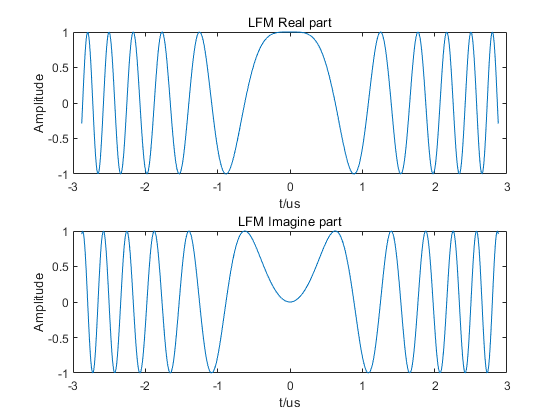

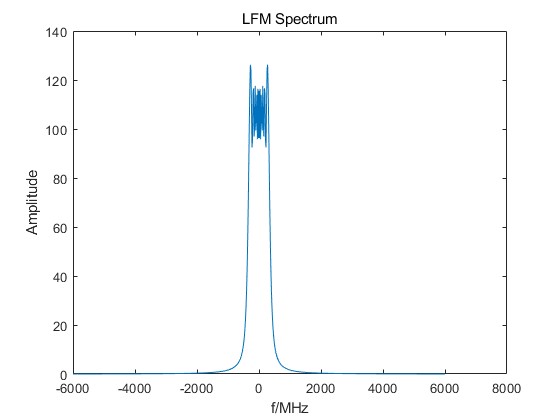

In [1]:
%function x = LFM()
%myFun - Description
%This code if for generating LFM Code
% Syntax: x = LFM()
% 
% Long description
 
close all;
clear;
    
fs = 1200e6; Ts = 1/fs;                    %sample frequency 
fc = fs/6 + rand*(fs/5-fs/6);            %carrier frequency
B = fs/20+rand*(fs/16-fs/20);            %Bandwidth
N = 512+randi(1920-512);                 %rand length of samples
T = N*Ts;                                %total time
k = B/T;
t = linspace(-T/2,T/2,N);                 %set up time vector


s = exp(1i*k*pi*t.^2);                   %LFM Signal

figure(1)
subplot(2,1,1);
plot(t*10e6,real(s));
set(get(gca, 'XLabel'), 'String', 't/us');
set(get(gca, 'YLabel'), 'String', 'Amplitude');
set(get(gca, 'Title'), 'String', 'LFM Real part');
subplot(2,1,2);
plot(t*10e6,imag(s));
set(get(gca, 'XLabel'), 'String', 't/us');
set(get(gca, 'YLabel'), 'String', 'Amplitude');
set(get(gca, 'Title'), 'String', 'LFM Imagine part');


figure(2)
f = linspace(-fs/2,fs/2,N);         %setup frequency vector
plot(f*10e-6,fftshift(abs(fft(s))));
set(get(gca, 'Title'), 'String', 'LFM Spectrum');
set(get(gca, 'XLabel'), 'String', 'f/MHz');
set(get(gca, 'YLabel'), 'String', 'Amplitude');

%end

## Frank Code

number of Frank Code :$M = \{6，7，8\}$   
sample rate: $SAR = floor(f_s/f_c)$  
number of  a subcode: $M*SAR$  
periods of code: $fix(\frac{N}{M*M*SAR})$  


ans =

    'The number of code phases is 7'


ans =

    'The carrier frequency is 2.36535e+08'


ans =

    'The number of samples is 650'




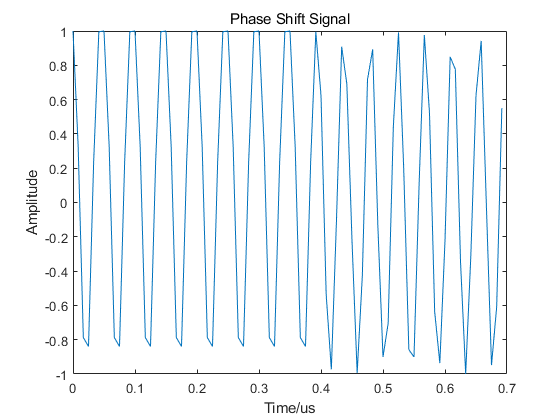

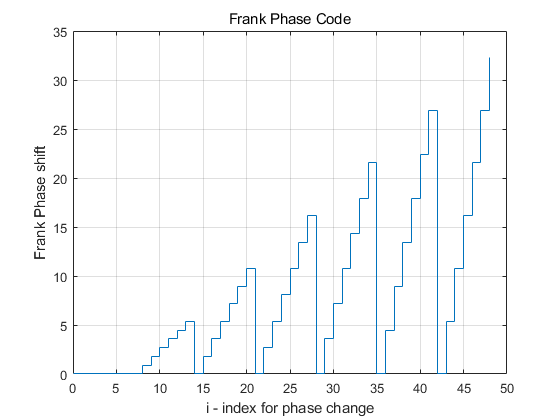

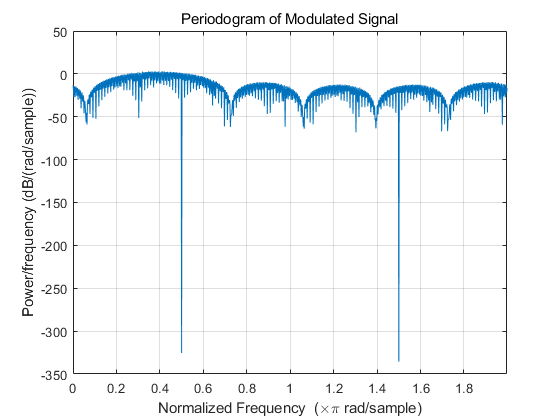

In [2]:
%function x = Frank_Code()
%myFun - Description
%This code is for generating Frank Code. 
% Syntax: x = Frank_Code()
%
% Long description

close all;
clear;
    
fs = 1200e6; Ts = 1/fs;                    %sample frequency 
fc = fs/6 + rand*(fs/5-fs/6);            %carrier frequency
M = randi(3)+5;                          %random # of code phases                     
A = 1;                                   %Amplitude
SAR = ceil(fs/fc);                       %sampling ratio
N = 512+randi(1920-512);                 %rand length of signal
P = fix(N/(M*M*SAR));                    %periods of code


%Generating the phase matrix
for i = 1:M
    for j = 1:M
        phi(i,j)=2*pi/M*(i-1)*(j-1);        
    end    
end


index = 0;
for i = 1:M
    for j = 1:M
        for n = 1:SAR
            I(index+1)=A*cos(2*pi*fc*(n-1)*Ts+phi(i,j));
            Q(index+1)=A*sin(2*pi*fc*(n-1)*Ts+phi(i,j));
            index = index + 1;        
        end
    end    
end

%total P periods of subcode
temp1 = I;I=[];
temp2 = Q;Q=[];
for i =1:P
    I=[I temp1];
    Q=[Q temp2];
end


t = 0:Ts:P*M*M*SAR*Ts-Ts;                    %setup time vector


S = I+sqrt(-1).*Q; %modulated signal
phase_signal = angle(S);

figure(1);
t_plot = t(1:floor(length(t)/M)); %for plotting using a small fraction of t
I_plot = I(1:floor(length(I)/M));
plot(t_plot*10e6,I_plot);
set(get(gca, 'Title'), 'String', 'Phase Shift Signal');
set(get(gca, 'XLabel'), 'String', 'Time/us');
set(get(gca, 'YLabel'), 'String', 'Amplitude');

figure(2);
nn = 0;
for ii=1:M
    for jj=1:M
        nn=nn+1;
        phi2(nn)=phi(ii,jj);
    end
end
xx = 0:length(phi2)-1;
stairs(xx,phi2);grid;
set(get(gca, 'Title'), 'String', 'Frank Phase Code');
xlabel('i - index for phase change');
set(get(gca, 'YLabel'), 'String', 'Frank Phase shift');

figure(3);
periodogram(S);
set(get(gca, 'Title'), 'String', 'Periodogram of Modulated Signal');



sprintf('The number of code phases is %g', M)
sprintf('The carrier frequency is %g', fc)
sprintf('The number of samples is %g', N)
%end



## Barker Code

length of Barker Code: $N_c = \{7,11,13\}$  
time of subcode: $t_{b}=1/f_c$  
samples of subcode: $SAR = floor(\frac{f_s}{f_c})$  
total samples: $N = U\{512,1920\}$  
total periods of Barker Code: $fix(\frac{N}{N_{c}*SAR})$  


ans =

    'The number of Barker code is 11.'


ans =

    'The total length of the signal is 1820'




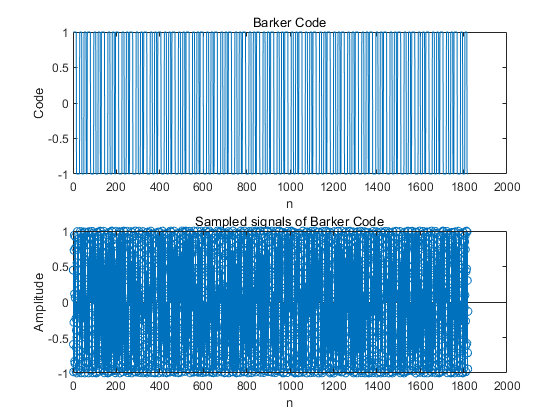

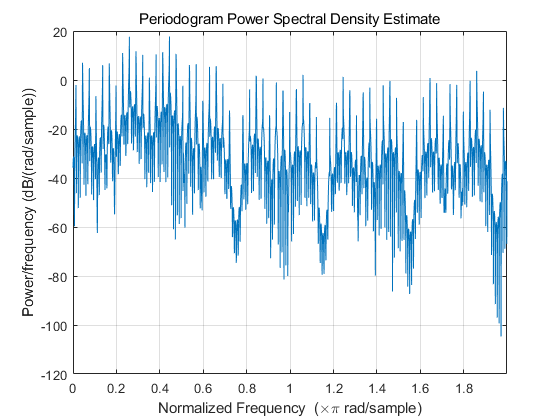

In [3]:
%function x = Barker_Code()
%myFun - Description
%
% Syntax: x = Barker_Code()
%
% Long description
    
clc;clear all;

A = 1;                                   %Amplitude
fs = 1200e6; Ts = 1/fs;                    %sample frequency 
fc = fs/6 + rand*(fs/5-fs/6);            %carrier frequency
SAR = floor(fs/fc);                      %sample rate
M = randi(3);                            %# of Barker Code


%Generating Barker Code
if M == 1
    Barker = [ones(1,SAR*3)  -(ones(1,SAR*2)) ones(1,SAR*1) -ones(1,SAR)];
    k = 7;
elseif M == 2
    Barker = [ones(1,SAR*3)  -(ones(1,SAR*3)) ones(1,SAR*2) -ones(1,SAR) -ones(1,SAR) ones(1,SAR*2) -ones(1,SAR)];
    k = 11;
else
    Barker = [ones(1,SAR*5) -(ones(1,SAR*2)) ones(1,SAR*2) -ones(1,SAR) ones(1,SAR*2) -ones(1,SAR) ones(1,SAR*2)];
    k = 13;
end


brkseq = [];
N_b = length(Barker);
N = fix((512+randi(1920-512))/N_b);           %Code Periods
n = 1:1:N*N_b;                            %set up vectors for n


for i = 1:N
    brkseq = [brkseq,Barker];
end

%modulated signal
I = A*cos(2*pi.*n*fc/fs).*brkseq;
Q = A*sin(2*pi.*n*fc/fs).*brkseq;
signal = I + sqrt(-1)*Q;

figure(1)
subplot(2,1,1);
plot(n,brkseq);
set(get(gca, 'XLabel'), 'String', 'n');
set(get(gca, 'YLabel'), 'String', 'Code');
set(get(gca, 'Title'), 'String', 'Barker Code');
subplot(2,1,2);
stem(n,I);
set(get(gca, 'Title'), 'String', 'Sampled signals of Barker Code');
set(get(gca, 'XLabel'), 'String', 'n');
set(get(gca, 'YLabel'), 'String', 'Amplitude');


figure(2)
periodogram(signal);

sprintf('The number of Barker code is %g.', k)
sprintf('The total length of the signal is %g', length(n))


%end

## Costas    
frequency sequence：$\{[3,2,6,4,5,1],[5,4,6,2,3,1],[2,4,8,5,10,9,7.3.6.1]\}$


The frequency sequency is
    30000000    20000000    60000000    40000000    50000000    10000000




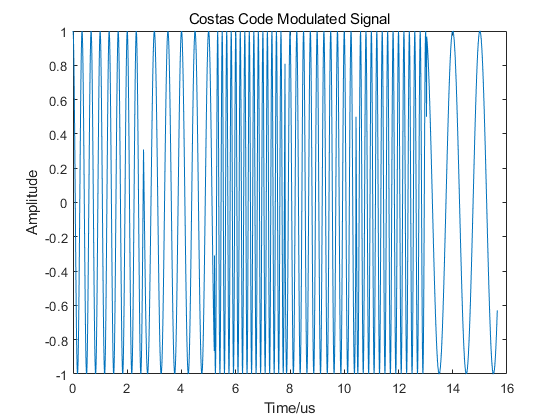

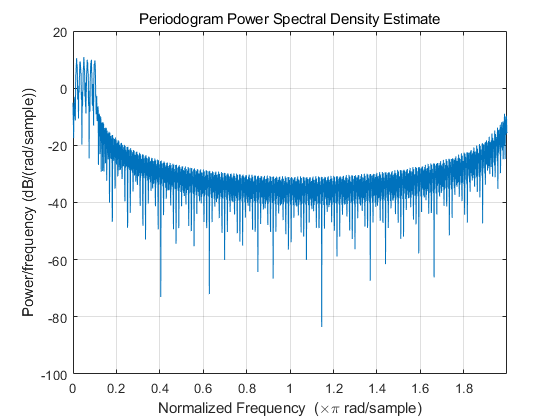

In [4]:
%function x = Costa_Code()
%myFun - Description
%This function is used to generate Costa Code.
% Syntax: x = Costa_Code()
%
% Long description
    
clc;clear all;

A = 1;                                   %Amplitude
fs = 1200e6; Ts = 1/fs;                    %sample frequency 
fc = fs/6 + rand*(fs/5-fs/6);            %carrier frequency
SAR = floor(fs/fc);                      %sample rate
k = randi(3);                            %index of frequency sequence
N = 512 + randi(1920-512);               %length of samples

if k==1
    freq = [3 2 6 4 5 1].*10e6;
elseif k==2
    freq = [5 4 6 2 3 1].*10e6;
else
    freq = [2 4 8 5 10 9 7 3 6 1].*10e6;
end

N_f = length(freq);
np = fix(N/N_f);                %samples per fre                
n = 1:np;                       %set up vectors for modulated signal
t = 0:Ts:np*N_f*Ts-Ts;          %set up time vector

index = 0;
for i = 1:N_f
        I((i-1)*np+1:i*np) = A*cos(2*pi*freq(i).*t((i-1)*np+1:i*np));
        Q((i-1)*np+1:i*np) = A*sin(2*pi*freq(i).*t((i-1)*np+1:i*np));
end


figure(1);
plot(t*10e6,I);
set(get(gca, 'Title'), 'String', 'Costas Code Modulated Signal');
set(get(gca, 'XLabel'), 'String', 'Time/us');
set(get(gca, 'YLabel'), 'String', 'Amplitude');

signal = I + sqrt(-1)*Q;
figure(2);
periodogram(signal);


disp('The frequency sequency is')
disp(freq)



##  P1 Code  
number of P1 Code :$M = \{6,7,8\}$   
sample rate: $SAR = floor(f_s/f_c)$  
number of  a subcode: $M*SAR$  
periods of code: $fix(\frac{N}{M*M*SAR})$  


ans =

    'The number of code phases is 7'


ans =

    'The carrier frequency is 2.38287e+08'


ans =

    'The number of samples is 1470'




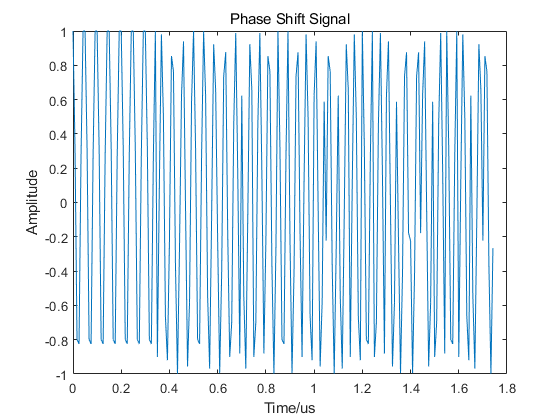

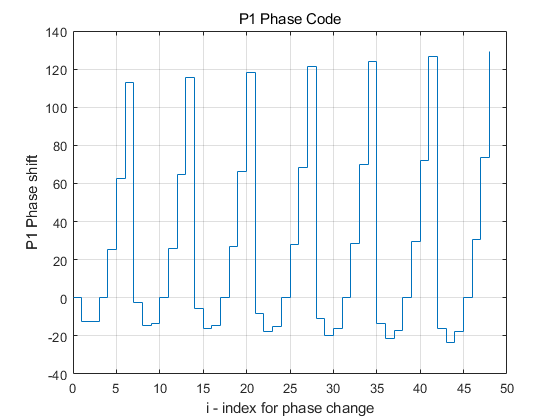

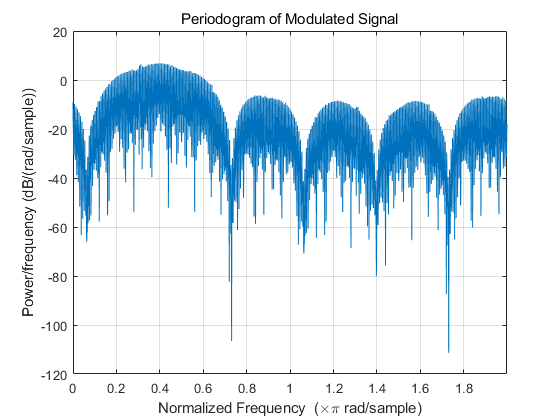

In [5]:
%function x = P1_Code()
%myFun - Description
%This code is for generating P1 Code. 
% Syntax: x = Frank_Code()
%
% Long description

close all;
clear;
    
fs = 1200e6; Ts = 1/fs;                    %sample frequency 
fc = fs/6 + rand*(fs/5-fs/6);            %carrier frequency
M = randi(3)+5;                          %random # of code phases                     
A = 1;                                   %Amplitude
SAR = ceil(fs/fc);                       %sampling ratio
N = 512 + randi(1920-512);               %length of samples
P = fix(N/(M*M*SAR));                    %periods of codes

%Generating the phase matrix
for i = 1:M
    for j = 1:M
        phi(i,j)=-pi/M*[M-(2*j-1)]*[(j-1)*M+(i-1)];        
    end    
end


index = 0;
for i = 1:M
    for j = 1:M
        for n = 1:SAR
            I(index+1)=A*cos(2*pi*fc*(n-1)*Ts+phi(i,j));
            Q(index+1)=A*sin(2*pi*fc*(n-1)*Ts+phi(i,j));
            index = index + 1;        
        end
    end    
end


temp1 = I; I=[];
temp2 = Q; Q=[];
for i =1:P
    I =[I temp1];
    Q =[Q temp2];
end

t = 0:Ts:P*M*M*SAR*Ts-Ts;                    %setup time vector


S = I+sqrt(-1).*Q; %modulated signal
phase_signal = angle(S);

figure(1);
t_plot = t(1:floor(length(t)/M)); %for plotting using a small fraction of t
I_plot = I(1:floor(length(I)/M));
plot(t_plot*10e6,I_plot);
set(get(gca, 'Title'), 'String', 'Phase Shift Signal');
set(get(gca, 'XLabel'), 'String', 'Time/us');
set(get(gca, 'YLabel'), 'String', 'Amplitude');


figure(2);
nn = 0;
for ii=1:M
    for jj=1:M
        nn=nn+1;
        phi2(nn)=phi(ii,jj);
    end
end
xx = 0:length(phi2)-1;
stairs(xx,phi2);grid;
set(get(gca, 'Title'), 'String', 'P1 Phase Code');
xlabel('i - index for phase change');
set(get(gca, 'YLabel'), 'String', 'P1 Phase shift');

figure(3);
periodogram(S);
set(get(gca, 'Title'), 'String', 'Periodogram of Modulated Signal');



sprintf('The number of code phases is %g', M)
sprintf('The carrier frequency is %g', fc)
sprintf('The number of samples is %g', P*M*M*SAR)
%end



##  P2 Code  
number of P2 Code :$M = \{6,8\}$   
sample rate: $SAR = floor(f_s/f_c)$  
number of  a subcode: $M*SAR$  
periods of code: $fix(\frac{N}{M*M*SAR})$  


ans =

    'The number of code phases is 6'


ans =

    'The carrier frequency is 2.05675e+08'


ans =

    'The number of samples is 1728'




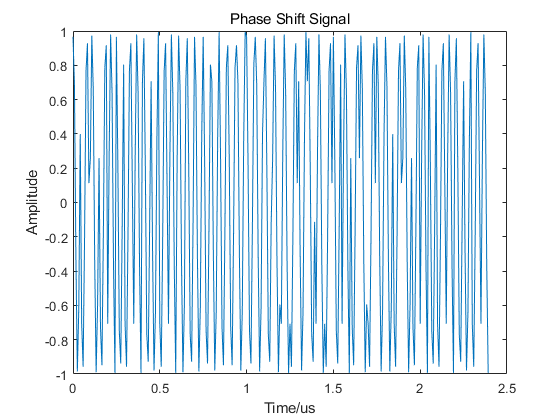

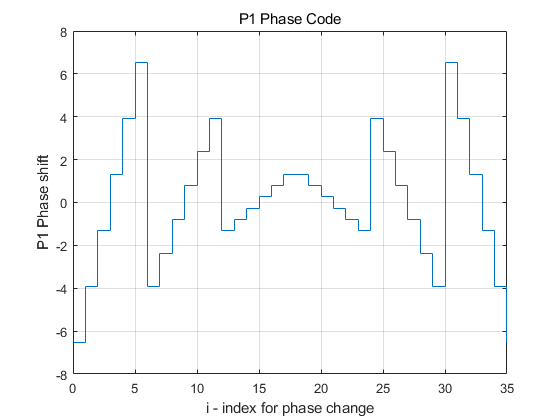

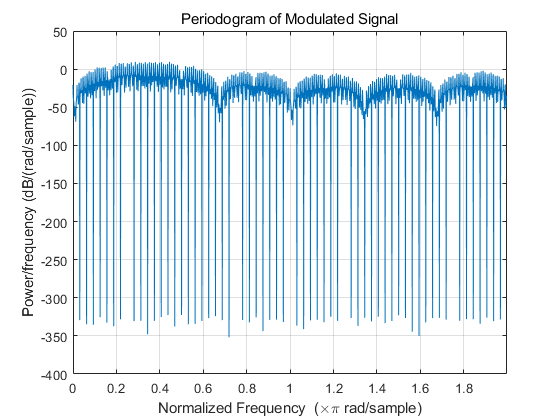

In [6]:
%function x = P2_Code()
%myFun - Description
%This code is for generating P2 Code. 
% Syntax: x = P2_Code()
%
% Long description

close all;
clear;
    
fs = 1200e6; Ts = 1/fs;                    %sample frequency 
fc = fs/6 + rand*(fs/5-fs/6);            %carrier frequency
M = 2*randi(2)+4;                          %random # of code phases                     
A = 1;                                   %Amplitude
SAR = ceil(fs/fc);                       %sampling ratio
N = 512 + randi(1920-512);               %length of samples
P = fix(N/(M*M*SAR));                    %periods of codes

%Generating the phase matrix
for i = 1:M
    for j = 1:M
       phi(i,j)=-pi/(2*M)*[2*i-1-M]*[2*j-1-M];       
    end    
end


index = 0;
for i = 1:M
    for j = 1:M
        for n = 1:SAR
            I(index+1)=A*cos(2*pi*fc*(n-1)*Ts+phi(i,j));
            Q(index+1)=A*sin(2*pi*fc*(n-1)*Ts+phi(i,j));
            index = index + 1;        
        end
    end    
end


temp1 = I; I=[];
temp2 = Q; Q=[];
for i =1:P
    I =[I temp1];
    Q =[Q temp2];
end

t = 0:Ts:P*M*M*SAR*Ts-Ts;                    %setup time vector


S = I+sqrt(-1).*Q; %modulated signal
phase_signal = angle(S);

figure(1);
t_plot = t(1:floor(length(t)/M)); %for plotting using a small fraction of t
I_plot = I(1:floor(length(I)/M));
plot(t_plot*10e6,I_plot);
set(get(gca, 'Title'), 'String', 'Phase Shift Signal');
set(get(gca, 'XLabel'), 'String', 'Time/us');
set(get(gca, 'YLabel'), 'String', 'Amplitude');


figure(2);
nn = 0;
for ii=1:M
    for jj=1:M
        nn=nn+1;
        phi2(nn)=phi(ii,jj);
    end
end
xx = 0:length(phi2)-1;
stairs(xx,phi2);grid;
set(get(gca, 'Title'), 'String', 'P1 Phase Code');
xlabel('i - index for phase change');
set(get(gca, 'YLabel'), 'String', 'P1 Phase shift');

figure(3);
periodogram(S);
set(get(gca, 'Title'), 'String', 'Periodogram of Modulated Signal');



sprintf('The number of code phases is %g', M)
sprintf('The carrier frequency is %g', fc)
sprintf('The number of samples is %g', P*M*M*SAR)
%end



## P3 Code 
number of P3 Code :$M = \{6,7,8\}$   
sample rate: $SAR = floor(f_s/f_c)$  
number of  a subcode: $M*SAR$  
periods of code: $fix(\frac{N}{M*M*SAR})$  


ans =

    'The number of code phases is 8'


ans =

    'The carrier frequency is 2.31688e+08'


ans =

    'The number of samples is 1436'




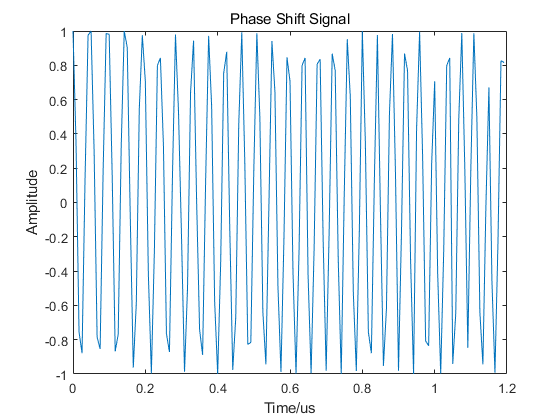

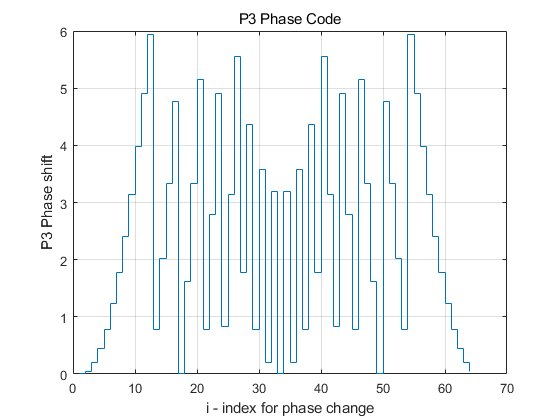

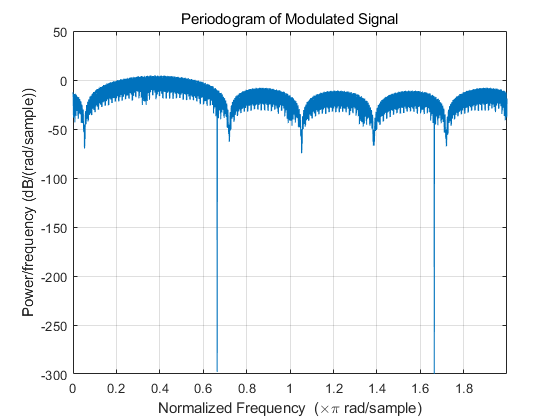

In [7]:
%function x = P3_Code()
%myFun - Description
%This code is for generating P3 Code. 
% Syntax: x = P3_Code()
%
% Long description

close all;
clear;
    
fs = 1200e6; Ts = 1/fs;                    %sample frequency 
fc = fs/6 + rand*(fs/5-fs/6);            %carrier frequency
M = randi(3)+5;                          %random # of code phases                     
Nc = M*M;                                %compression ratio
A = 1;                                   %Amplitude
SAR = ceil(fs/fc);                       %sampling ratio
N = 512+randi(1920-512);
P = fix(N/(M*M*SAR));                    %periods of codes


%Generating the phase matrix
for i = 1:Nc
        phi(i)=pi/Nc*(i-1)^2;            
end


index = 0;
for i = 1:Nc
        for n = 1:SAR
            I(index+1)=A*cos(2*pi*fc*(n-1)*Ts+phi(i));
            Q(index+1)=A*sin(2*pi*fc*(n-1)*Ts+phi(i));
            index = index + 1;        
        end
end


temp1 = I; I=[];
temp2 = Q; Q=[];
for i =1:P
    I =[I temp1];
    Q =[Q temp2];
end


t = 0:Ts:P*M*M*SAR*Ts-Ts;                    %setup time vector


S = I+sqrt(-1).*Q; %modulated signal
phase_signal = angle(S);

figure(1);
t_plot = t(1:floor(length(t)/M)); %for plotting using a small fraction of t
I_plot = I(1:floor(length(I)/M));
plot(t_plot*10e6,I_plot);
set(get(gca, 'Title'), 'String', 'Phase Shift Signal');
set(get(gca, 'XLabel'), 'String', 'Time/us');
set(get(gca, 'YLabel'), 'String', 'Amplitude');


figure(2);
n = 1:Nc;
undoo = rem(phi,2*pi);
stairs(n,undoo);grid;
set(get(gca, 'Title'), 'String', 'P3 Phase Code');
xlabel('i - index for phase change');
set(get(gca, 'YLabel'), 'String', 'P3 Phase shift');

figure(3);
periodogram(S);
set(get(gca, 'Title'), 'String', 'Periodogram of Modulated Signal');



sprintf('The number of code phases is %g', M)
sprintf('The carrier frequency is %g', fc)
sprintf('The number of samples is %g',N)
%end



## P4 Code
number of P4 Code :$M = \{6,7,8\}$   
sample rate: $SAR = floor(f_s/f_c)$  
number of  a subcode: $M*SAR$  
periods of code: $fix(\frac{N}{M*M*SAR})$  


ans =

    'The number of code phases is 8'


ans =

    'The carrier frequency is 2.01428e+08'


ans =

    'The number of samples is 1828'




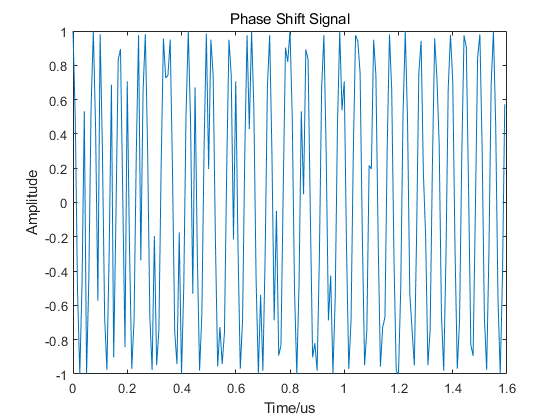

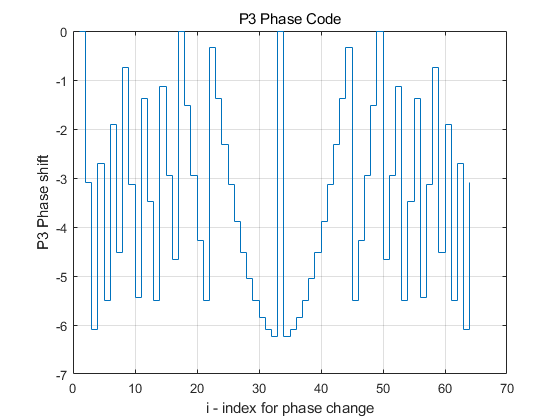

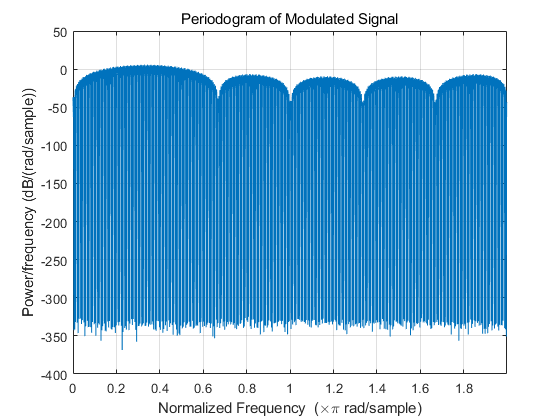

In [8]:
%function x = P4_Code()
%myFun - Description
%This code is for generating P4 Code. 
% Syntax: x = P4_Code()
%
% Long description

close all;
clear;
    
fs = 1200e6; Ts = 1/fs;                    %sample frequency 
fc = fs/6 + rand*(fs/5-fs/6);            %carrier frequency
M = randi(3)+5;                          %random # of code phases                     
Nc = M*M;                                %compression ratio
A = 1;                                   %Amplitude
SAR = ceil(fs/fc);                       %sampling ratio
N = 512+randi(1920-512);
P = fix(N/(M*M*SAR));                    %periods of codes


%Generating the phase matrix
for i = 1:Nc
       phi(i)=pi/Nc*(i-1)^2-pi*(i-1);             
end


index = 0;
for i = 1:Nc
        for n = 1:SAR
            I(index+1)=A*cos(2*pi*fc*(n-1)*Ts+phi(i));
            Q(index+1)=A*sin(2*pi*fc*(n-1)*Ts+phi(i));
            index = index + 1;        
        end
end


temp1 = I; I=[];
temp2 = Q; Q=[];
for i =1:P
    I =[I temp1];
    Q =[Q temp2];
end


t = 0:Ts:P*M*M*SAR*Ts-Ts;                    %setup time vector


S = I+sqrt(-1).*Q; %modulated signal
phase_signal = angle(S);

figure(1);
t_plot = t(1:floor(length(t)/M)); %for plotting using a small fraction of t
I_plot = I(1:floor(length(I)/M));
plot(t_plot*10e6,I_plot);
set(get(gca, 'Title'), 'String', 'Phase Shift Signal');
set(get(gca, 'XLabel'), 'String', 'Time/us');
set(get(gca, 'YLabel'), 'String', 'Amplitude');


figure(2);
n = 1:Nc;
undoo = rem(phi,2*pi);
stairs(n,undoo);grid;
set(get(gca, 'Title'), 'String', 'P3 Phase Code');
xlabel('i - index for phase change');
set(get(gca, 'YLabel'), 'String', 'P3 Phase shift');

figure(3);
periodogram(S);
set(get(gca, 'Title'), 'String', 'Periodogram of Modulated Signal');



sprintf('The number of code phases is %g', M)
sprintf('The carrier frequency is %g', fc)
sprintf('The number of samples is %g',N)
%end



## T1 Code  
序列段数：$\{4,5,6\}$


ans =

    'Number of stepped frequency segments is 6.'


ans =

    'The length of signal is 1559.'




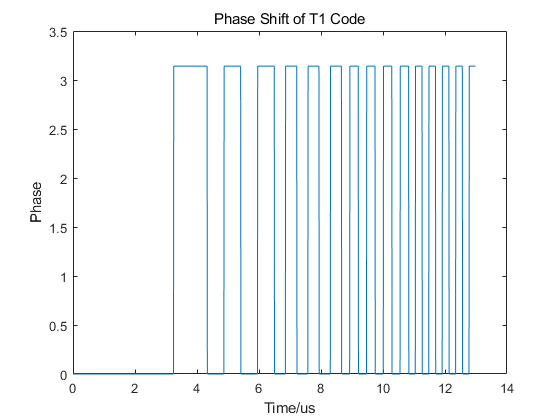

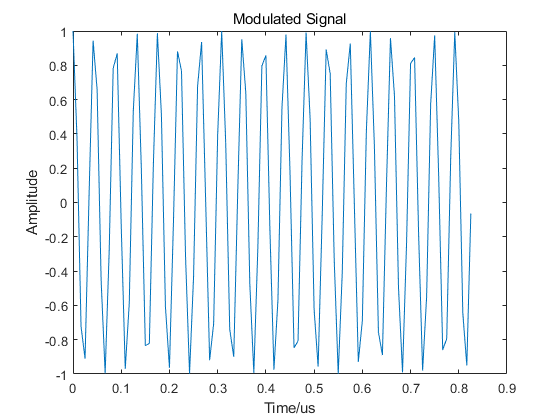

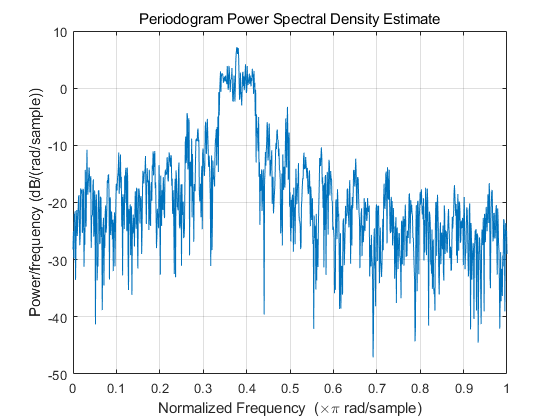

In [9]:
%function x = T1_Code()
%myFun - Description
%
% Syntax: x = T1_Code()
%
% Long description
    

close all;
clear;
    
fs = 1200e6; Ts = 1/fs;                    %sample frequency 
fc = fs/6 + rand*(fs/5-fs/6);              %carrier frequency
A=1;                                       %Amplitude
k = randi(3)+3;                              %Number of stepped frequency segments
m =2;                                      %Number of phase states 
N = 512 + randi(1920 - 512);
SAR = floor(fc/fs);
T = N*Ts;
t = 0:Ts:N*Ts-Ts;


index = 1;
for tt = 0:Ts:(N*Ts-Ts)
    jj = floor(k*tt/T);
    phase(index) = mod(((2*pi/m)*floor(((k*tt - jj*T)*(jj*m/T)))), 2*pi); 
    index = index + 1;
end

for i = 1: N
    I(i) = A*cos(2*pi*fc*(i-1)*Ts+phase(i));
    Q(i) = A*sin(2*pi*fc*(i-1)*Ts+phase(i));
end

S = I + sqrt(-1)*Q;

figure(1);
plot(t*10e6,phase);
set(get(gca, 'Title'), 'String', 'Phase Shift of T1 Code');
set(get(gca, 'XLabel'), 'String', 'Time/us');
set(get(gca, 'YLabel'), 'String', 'Phase');

figure(2);
plot(t(1:100)*10e6,I(1:100));
set(get(gca, 'Title'), 'String', 'Modulated Signal');
set(get(gca, 'XLabel'), 'String', 'Time/us');
set(get(gca, 'YLabel'), 'String', 'Amplitude');


figure(3);
periodogram(I);

sprintf('Number of stepped frequency segments is %g.', k)
sprintf('The length of signal is %g.', N)

%end

## T2 Code


ans =

    'Number of stepped frequency segments is 5.'


ans =

    'The length of signal is 754.'




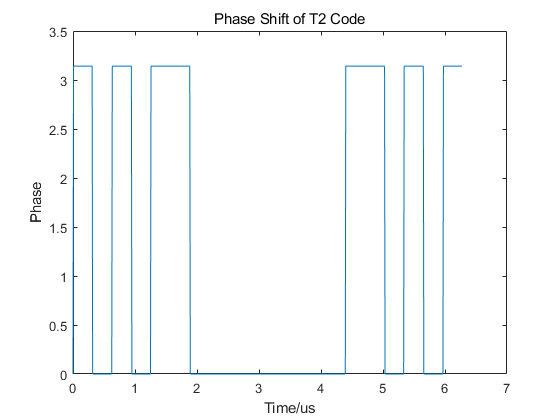

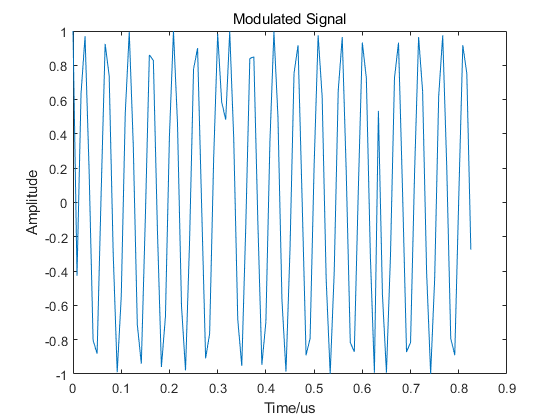

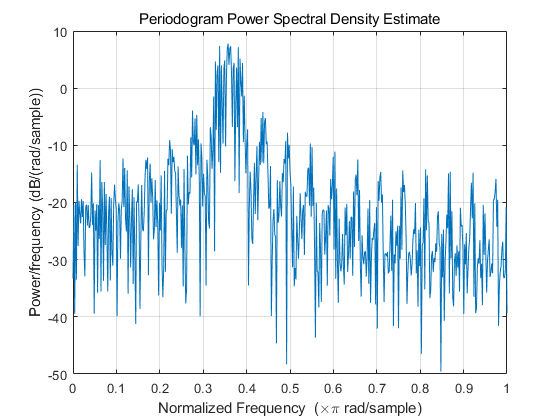

In [10]:
%function x = T2_Code()
%myFun - Description
%
% Syntax: x = T2_Code()
%
% Long description
    

close all;
clear;
    
fs = 1200e6; Ts = 1/fs;                    %sample frequency 
fc = fs/6 + rand*(fs/5-fs/6);              %carrier frequency
A=1;                                       %Amplitude
k = randi(3)+3;                              %Number of stepped frequency segments
m =2;                                      %Number of phase states 
N = 512 + randi(1920 - 512);
SAR = floor(fc/fs);
T = N*Ts;
t = 0:Ts:N*Ts-Ts;
deltaf = 250;
deltaphi = 2*pi/m;


index = 1;
for tt = 0:Ts:(N*Ts-Ts)
    jj = floor(k*tt/T);
    phase(index) = mod(((2*pi/m)*floor((((k*tt - jj*T)*((2*jj-k+1)/T)*(m/2))))), 2*pi); 
    index = index + 1;
end

for i = 1: N
    I(i) = A*cos(2*pi*fc*(i-1)*Ts+phase(i));
    Q(i) = A*sin(2*pi*fc*(i-1)*Ts+phase(i));
end

S = I + sqrt(-1)*Q;

figure(1);
plot(t*10e6,phase);
set(get(gca, 'Title'), 'String', 'Phase Shift of T2 Code');
set(get(gca, 'XLabel'), 'String', 'Time/us');
set(get(gca, 'YLabel'), 'String', 'Phase');

figure(2);
plot(t(1:100)*10e6,I(1:100));
set(get(gca, 'Title'), 'String', 'Modulated Signal');
set(get(gca, 'XLabel'), 'String', 'Time/us');
set(get(gca, 'YLabel'), 'String', 'Amplitude');


figure(3);
periodogram(I);

sprintf('Number of stepped frequency segments is %g.', k)
sprintf('The length of signal is %g.', N)

%end

## T3 Code


ans =

    'Number of stepped frequency segments is 4.'


ans =

    'The length of signal is 902.'




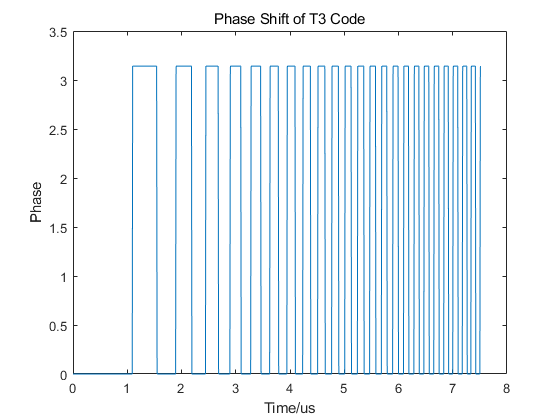

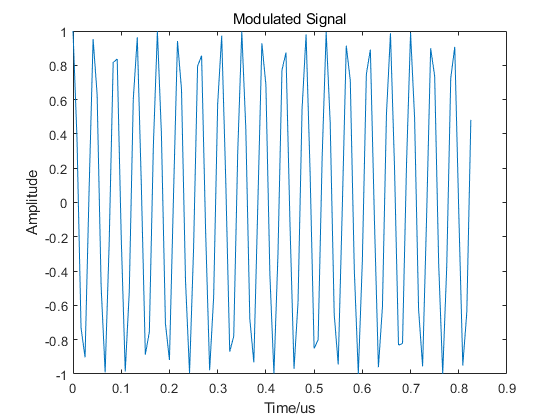

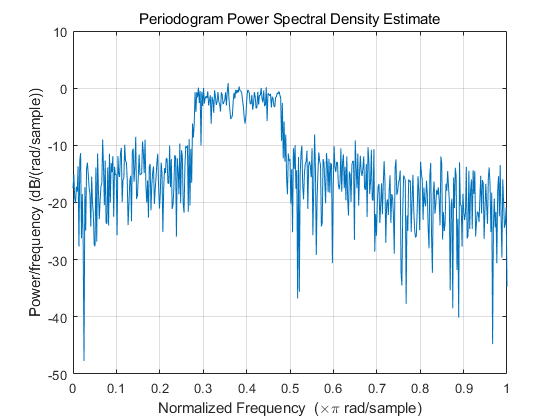

In [11]:
%function x = T2_Code()
%myFun - Description
%
% Syntax: x = T2_Code()
%
% Long description
    

close all;
clear;
    
fs = 1200e6; Ts = 1/fs;                    %sample frequency 
fc = fs/6 + rand*(fs/5-fs/6);              %carrier frequency
A=1;                                       %Amplitude
k = randi(3)+3;                              %Number of stepped frequency segments
m =2;                                      %Number of phase states 
N = 512 + randi(1920 - 512);
SAR = floor(fc/fs);
T = N*Ts;
t = 0:Ts:N*Ts-Ts;
deltaf = fs/20 + rand*(fs/10-fs/20);        %modulation bandwidth
deltaphi = 2*pi/m;


index = 1;
for tt = 0:Ts:(N*Ts-Ts)
    jj = floor(k*tt/T);
    phase(index) = mod(((2*pi/m)*floor((m*deltaf*tt.^2)/(2*T))),2*pi); 
    index = index + 1;
end

for i = 1: N
    I(i) = A*cos(2*pi*fc*(i-1)*Ts+phase(i));
    Q(i) = A*sin(2*pi*fc*(i-1)*Ts+phase(i));
end

S = I + sqrt(-1)*Q;

figure(1);
plot(t*10e6,phase);
set(get(gca, 'Title'), 'String', 'Phase Shift of T3 Code');
set(get(gca, 'XLabel'), 'String', 'Time/us');
set(get(gca, 'YLabel'), 'String', 'Phase');

figure(2);
plot(t(1:100)*10e6,I(1:100));
set(get(gca, 'Title'), 'String', 'Modulated Signal');
set(get(gca, 'XLabel'), 'String', 'Time/us');
set(get(gca, 'YLabel'), 'String', 'Amplitude');


figure(3);
periodogram(I);

sprintf('Number of stepped frequency segments is %g.', k)
sprintf('The length of signal is %g.', N)

%end

## T4 Code


ans =

    'Number of stepped frequency segments is 6.'


ans =

    'The length of signal is 1491.'




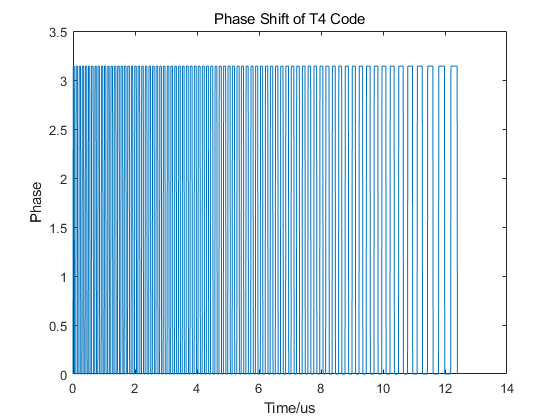

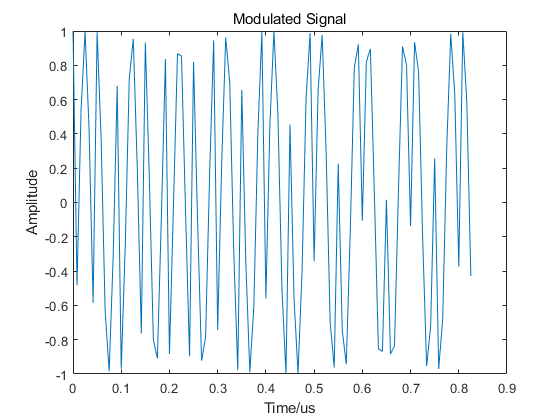

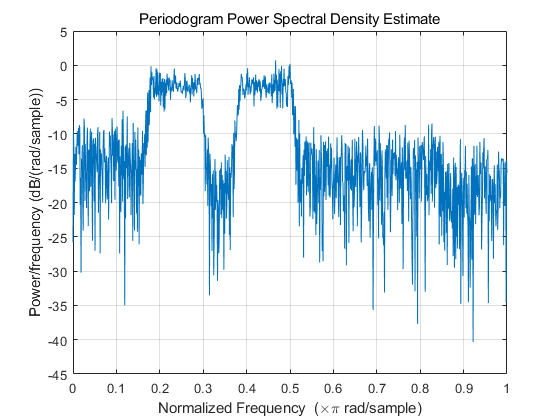

In [12]:
%function x = T2_Code()
%myFun - Description
%
% Syntax: x = T2_Code()
%
% Long description
    

close all;
clear;
    
fs = 1200e6; Ts = 1/fs;                    %sample frequency 
fc = fs/6 + rand*(fs/5-fs/6);              %carrier frequency
A=1;                                       %Amplitude
k = randi(3)+3;                              %Number of stepped frequency segments
m =2;                                      %Number of phase states 
N = 512 + randi(1920 - 512);
SAR = floor(fc/fs);
T = N*Ts;
t = 0:Ts:N*Ts-Ts;
deltaf = fs/20 + rand*(fs/10-fs/20);
deltaphi = 2*pi/m;


index = 1;
for tt = 0:Ts:(N*Ts-Ts)
    jj = floor(k*tt/T);
    phase(index) =  mod(((2*pi/m)*floor((m*deltaf*tt.^2)/(2*T)-(m*fc*tt)/2)),2*pi);
    index = index + 1;
end

for i = 1: N
    I(i) = A*cos(2*pi*fc*(i-1)*Ts+phase(i));
    Q(i) = A*sin(2*pi*fc*(i-1)*Ts+phase(i));
end

S = I + sqrt(-1)*Q;

figure(1);
plot(t*10e6,phase);
set(get(gca, 'Title'), 'String', 'Phase Shift of T4 Code');
set(get(gca, 'XLabel'), 'String', 'Time/us');
set(get(gca, 'YLabel'), 'String', 'Phase');

figure(2);
plot(t(1:100)*10e6,I(1:100));
set(get(gca, 'Title'), 'String', 'Modulated Signal');
set(get(gca, 'XLabel'), 'String', 'Time/us');
set(get(gca, 'YLabel'), 'String', 'Amplitude');


figure(3);
periodogram(I);

sprintf('Number of stepped frequency segments is %g.', k)
sprintf('The length of signal is %g.', N)

%end